In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# mnist 데이터셋 : 0-9 숫자 이미지, labeling 되어있음, 7만개
# train셋(6만개)과 test셋(1만개)으로 구분이 되도록 되어있음
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

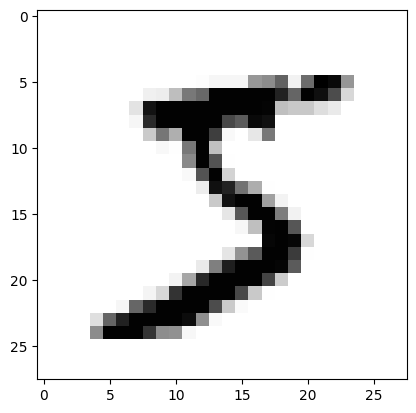

In [8]:
# 1번째 데이터 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [9]:
# 데이터 구조 확인
X_train[0].shape
# 28 x 28 pixel grey 이미지
# 각 픽셀은 0~255 숫자로 되어있고, 이는 검은색의 짙은 정도이다.

(28, 28)

In [35]:
# 숫자로 그림 그려보기
pic = '\n'.join([''.join([f'{y:4d}' for y in x]) for x in X_train[0]])
print(pic)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [54]:
# 1번째 데이터의 결과 확인
y_train[0]

5

In [52]:
# 학습을 위해 데이터셋을 1차원으로 변경
print(X_train.shape, X_test.shape)

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train.shape, X_test.shape
# 60000 x 28 x 28 -> 60000 x 784
# 10000 x 28 x 28 -> 10000 x 784

(60000, 28, 28) (10000, 28, 28)


((60000, 784), (10000, 784))

In [53]:
# 0-255 값으로 되어있는 걸 0-1 사이 숫자로 처리
# 데이터 정규화normalization
X_train = X_train.astype('float64') / 255
X_test = X_test.astype('float64') / 255

In [59]:
# 결과는 classfication이 가능하게, one_hot 처리
import keras.utils.np_utils as np_utils

y_train_t = np_utils.to_categorical(y_train)
print(y_train.shape, y_train_t.shape)
print(y_train[0], y_train_t[0])

(60000,) (60000, 10)
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [64]:
# tf one_hot을 써도 같은 결과이다. (단, depth 지정이 필요)
import tensorflow as tf

y_train_t = tf.one_hot(y_train, depth=max(y_train)+1)
print(y_train.shape, y_train_t.shape)
print(y_train[0], y_train_t[0])

(60000,) (60000, 10)
5 tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [65]:
y_train = y_train_t

In [66]:
y_test = np_utils.to_categorical(y_test)

(10000, 10)

## 딥러닝 기본 프레임 만들기

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구성
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# set callbacks : earlyStopping & checkpointer
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20
)

modelpath = './trained_model/ch16/mnist_mlp.hdf5'
checkpointer = ModelCheckpoint(
    filepath=modelpath,
    monitor='val_loss',
    verbose=0,
    save_best_only=True
)

In [76]:
# Do learning
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=200,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback, checkpointer],
                    verbose=0
                   )

loss, score = model.evaluate(X_test, y_test)
loss, score

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9820


(0.07587548345327377, 0.9819999933242798)

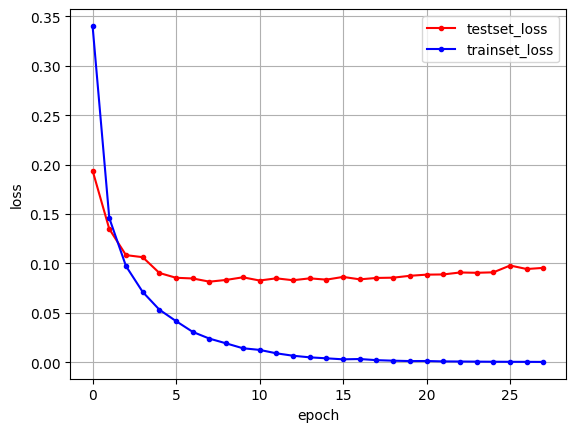

In [78]:
import matplotlib.pyplot as plt

# 오차 그래프 확인
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN

In [ ]:
# Conv2D(32, kerner_size=(3,3), input_shape=(28, 28, 1), activation='relu')
"""
conv 2d 레이어
32개 노드
kernel_size : 묶을 윈도우 사이즈 3x3 픽셀을 한 값으로 묶는다.
input_shape : 입력 형태, 1D로 reshape하지 않은, 2D를 넣는다(kerneling 해야하므로)
+ 마지막 인자는 색상 여부(1: 흑백, 3: 컬러)
활성 함수 : Relu
"""

In [ ]:
# MaxPooling2D(pool_size=(2,2))
"""
pool size 윈도우 만큼 뽑아내기
"""

In [ ]:
# Dropout(0.25)
"""
랜덤하게 꺼버릴 노드 비율
"""
# Flatten
"""
2차원 -> 1차원
"""

# CNN 이용한 학습 재구성

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

Epoch 1/50
225/225 [==============================] - 34s 145ms/step - loss: 0.3322 - accuracy: 0.8984 - val_loss: 0.0852 - val_accuracy: 0.9749
Epoch 2/50
225/225 [==============================] - 31s 138ms/step - loss: 0.1109 - accuracy: 0.9671 - val_loss: 0.0598 - val_accuracy: 0.9820
Epoch 3/50
225/225 [==============================] - 32s 142ms/step - loss: 0.0781 - accuracy: 0.9758 - val_loss: 0.0499 - val_accuracy: 0.9839
Epoch 4/50
225/225 [==============================] - 32s 143ms/step - loss: 0.0644 - accuracy: 0.9815 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 5/50
225/225 [==============================] - 33s 148ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0430 - val_accuracy: 0.9877
Epoch 6/50
225/225 [==============================] - 33s 146ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 7/50
225/225 [==============================] - 34s 149ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0411 - val_ac

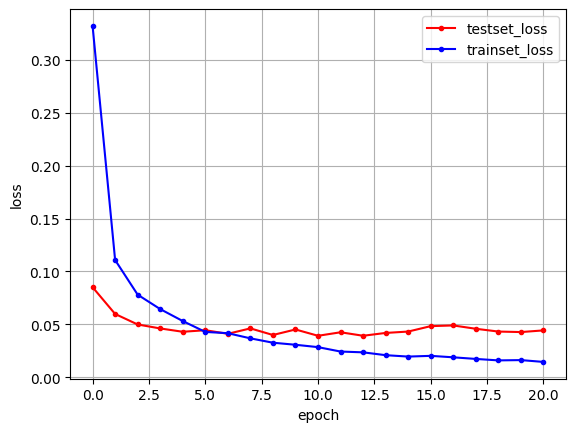

In [17]:
# 데이터 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 모델 구성
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'), # kernel_size는 2번째로 오면 name 생략가능
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# set callbacks : earlyStopping & checkpointer
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10
)

modelpath = './trained_model/ch16/mnist_cnn.hdf5'
checkpointer = ModelCheckpoint(
    filepath=modelpath,
    monitor='val_loss',
    verbose=0,
    save_best_only=True
)

# Do learning
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=200,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback, checkpointer],
                    verbose=1
                   )

loss, score = model.evaluate(X_test, y_test)
print("loss, score", loss, score)

# 오차 그래프 확인
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()